In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Collection

In [7]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\UNIFIED MENTOR PRIVATE LIMITED\Project 3 (Advance)\Excel\laptop_prices.csv")

# Display the First Five Row

In [79]:
data.head()

,Company,TypeName,Operating System,Inches,Ram,Weight,Screen,Memory,CPU,GPU,Price
0,Apple,Ultrabook,macOS,13.3,8 GB,1.37 Kg,Standard,128GB SSD,Core i5,Iris Plus Graphics 640,1339.69
1,Apple,Ultrabook,macOS,13.3,8 GB,1.34 Kg,Standard,128GB Flash Storage,Core i5,HD Graphics 6000,898.94
2,HP,Notebook,No OS,15.6,8 GB,1.86 Kg,Full HD,256GB SSD,Core i5 7200U,HD Graphics 620,575.00
3,Apple,Ultrabook,macOS,15.4,16 GB,1.83 Kg,Standard,512GB SSD,Core i7,Radeon Pro 455,2537.45
4,Apple,Ultrabook,macOS,13.3,8 GB,1.37 Kg,Standard,256GB SSD,Core i5,Iris Plus Graphics 650,1803.60


In [4]:
data.columns

Index(['Company', 'TypeName', 'Operating System', 'Inches', 'Ram', 'Weight',
       'Screen', 'Memory', 'CPU', 'GPU', 'Price'],
      dtype='object')

In [5]:
data.shape

(1275, 11)

# Information about the data frame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   TypeName          1275 non-null   object 
 2   Operating System  1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   Ram               1275 non-null   object 
 5   Weight            1275 non-null   object 
 6   Screen            1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   CPU               1275 non-null   object 
 9   GPU               1275 non-null   object 
 10  Price             1275 non-null   float64
dtypes: float64(2), object(9)
memory usage: 109.7+ KB


# Check For missing values

In [7]:
data.isnull().sum()

Company             0
TypeName            0
Operating System    0
Inches              0
Ram                 0
Weight              0
Screen              0
Memory              0
CPU                 0
GPU                 0
Price               0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1275.0,15.022902,1.429470,10.1,14.0,15.6,15.6,18.4
Price,1275.0,1134.969059,700.752504,174.0,609.0,989.0,1496.5,6099.0


In [28]:
data.duplicated().sum()

1

# Sales of Company

In [9]:
Company_data =data.groupby(['Company']).sum(['Price']).reset_index().sort_values(by='Price',ascending=False)

Text(0.5, 0, 'Price')

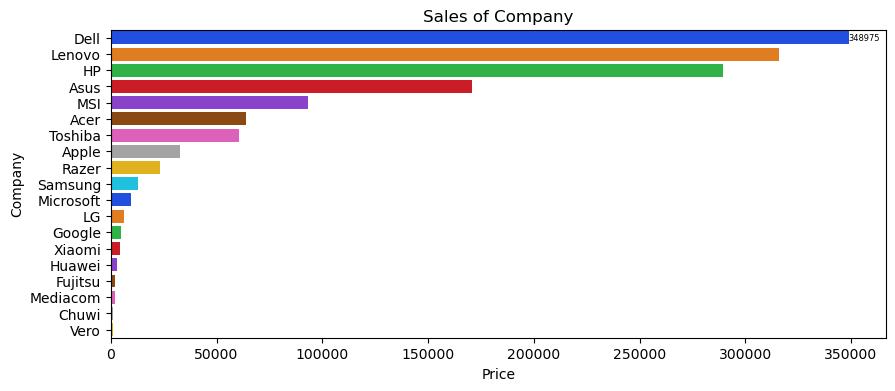

In [81]:
plt.figure(figsize=(10,4))
ax =sns.barplot(data=Company_data,x='Price',y='Company', hue='Company',palette='bright')
ax.bar_label(ax.containers[0], fontsize=6)
plt.title("Sales of Company")
plt.xlabel('Price')

# Sales of Operating System

In [37]:
OS_count = data.groupby('Operating System').size().reset_index(name='Count')

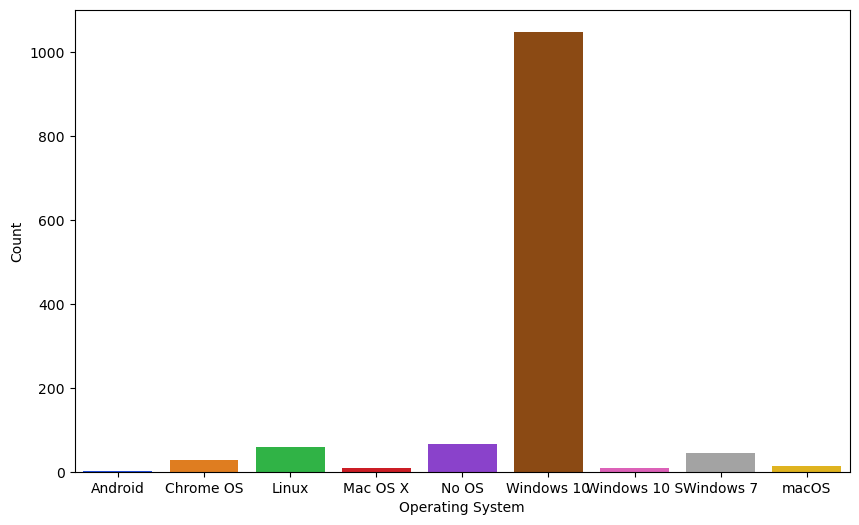

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=OS_count, x='Operating System', y='Count',hue = 'Operating System', palette='bright')
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.show()

# Sales of Type Name

In [39]:
Type_name =data.groupby(['TypeName']).sum(['Price']).reset_index().sort_values(by='Price',ascending=False)

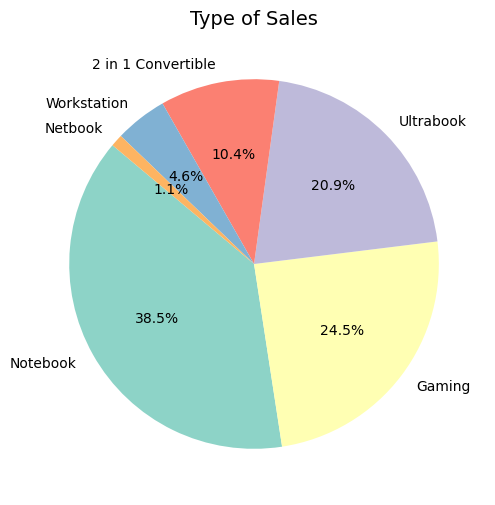

In [40]:
# Example: Pie chart for Company vs Price
plt.figure(figsize=(8, 6))

# Pie plot
plt.pie(Type_name['Price'],labels=Type_name['TypeName'],autopct='%1.1f%%',startangle=140,colors=plt.cm.Set3.colors)
plt.title("Type of Sales", fontsize=14)
plt.show()


# Screen Data 

In [38]:
data["Screen"].value_counts()

Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

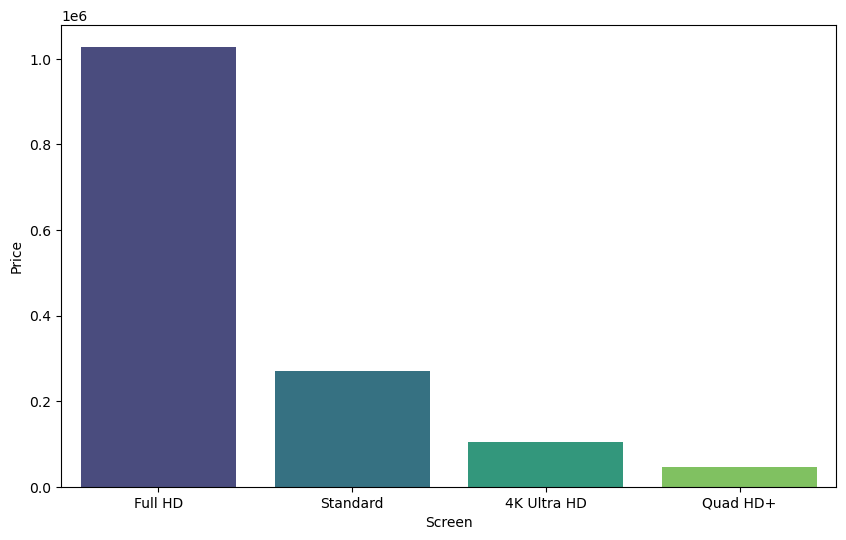

In [76]:
data =data.groupby(['Screen']).sum(['Price']).reset_index().sort_values(by='Price',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Screen', y='Price',hue = 'Screen', palette='viridis')
plt.xlabel("Screen")
plt.ylabel("Price")
plt.show()

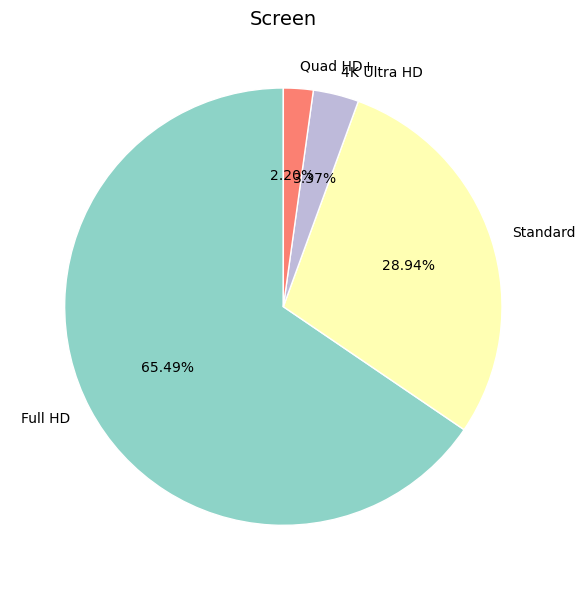

In [82]:
screen_counts = data['Screen'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie( screen_counts,labels=screen_counts.index,autopct='%.2f%%',startangle=90,colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'white'})
plt.title('Screen', fontsize=14)
plt.tight_layout()
plt.show()


# Ram Data

In [84]:
data["Ram"].value_counts()

Ram
8 GB     613
4 GB     367
16 GB    198
6 GB      35
12 GB     25
32 GB     17
2 GB      16
24 GB      3
64 GB      1
Name: count, dtype: int64

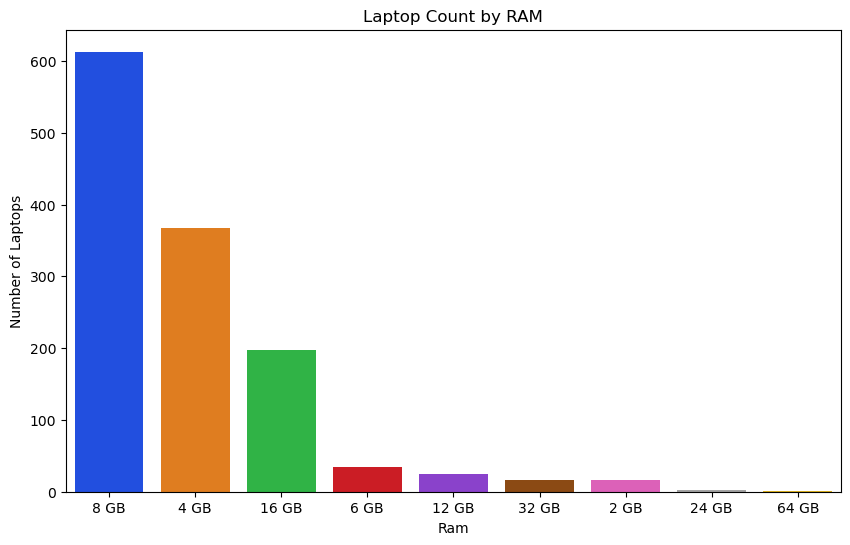

In [53]:
Ram_data = data.groupby('Ram').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=Ram_data, x='Ram', y='Count', hue='Ram', palette='bright', dodge=False)
plt.xlabel("Ram")
plt.ylabel("Number of Laptops")
plt.title("Laptop Count by RAM")
plt.show()


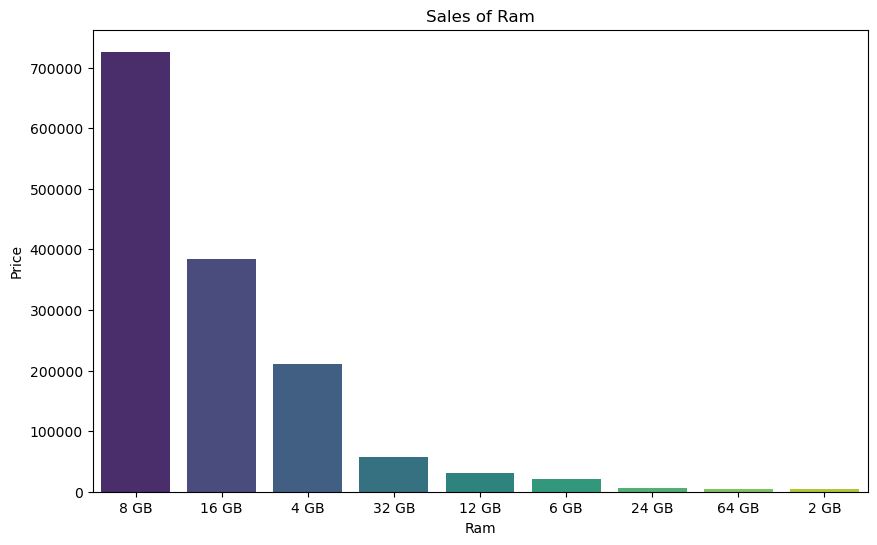

In [55]:
Ram_data =data.groupby(['Ram']).sum(['Price']).reset_index().sort_values(by='Price',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=Ram_data, x='Ram', y='Price',hue = 'Ram', palette='viridis')
plt.title("Sales of Ram")
plt.xlabel("Ram")
plt.ylabel("Price")
plt.show()

# Inches data

In [85]:
data["Inches"].value_counts()

Inches
15.6    647
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [71]:
Inches_data =data.groupby(['Inches']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

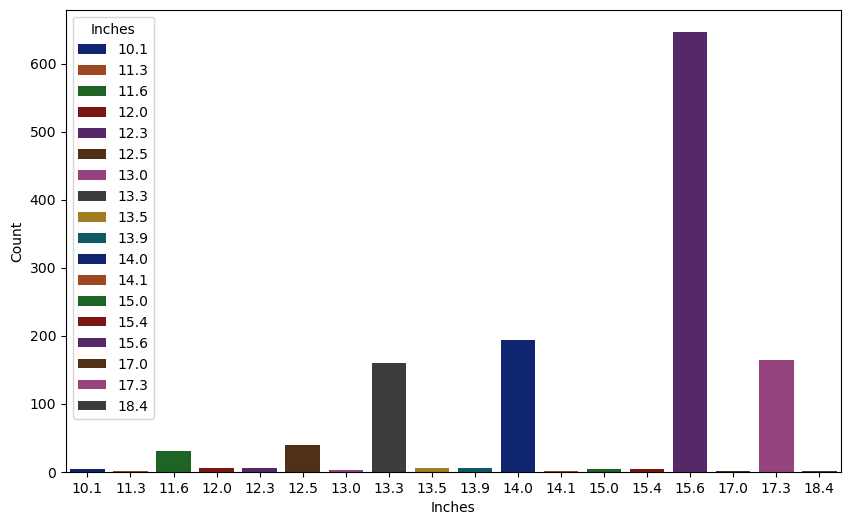

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(data=Inches_data, x='Inches', y='Count',hue ='Inches', palette='dark')
plt.show()


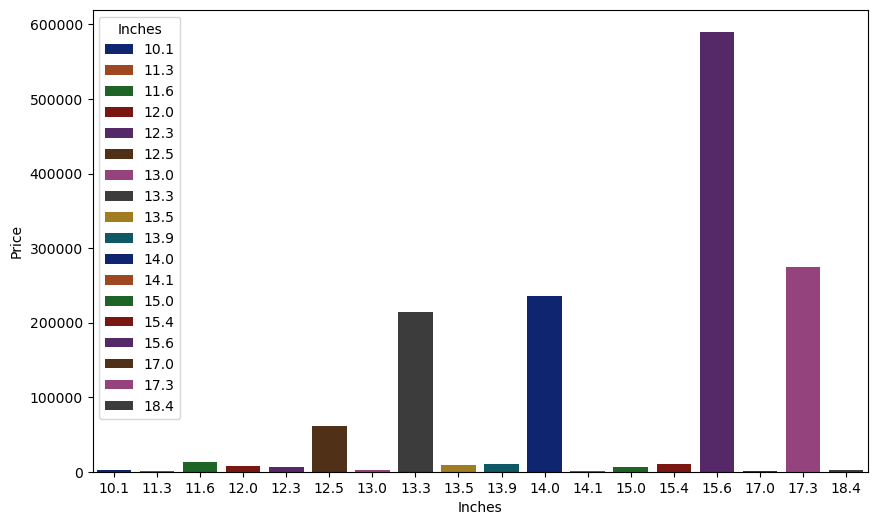

In [8]:
Inches_data =data.groupby(['Inches']).sum(['Price']).reset_index().sort_values(by='Price',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=Inches_data, x='Inches', y='Price',hue ='Inches', palette='dark')
plt.show()

 # OS VS CPU freqency

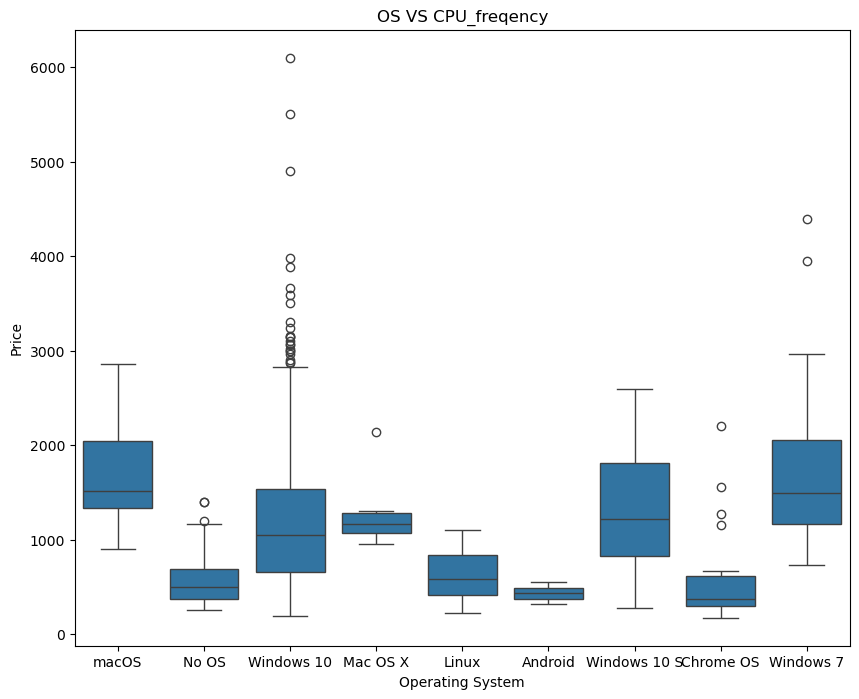

In [21]:
plt.figure(figsize = (10,8))
sns.boxplot(x = data['Operating System'], y= data['Price'])
plt.title('OS VS CPU_freqency')
plt.show()

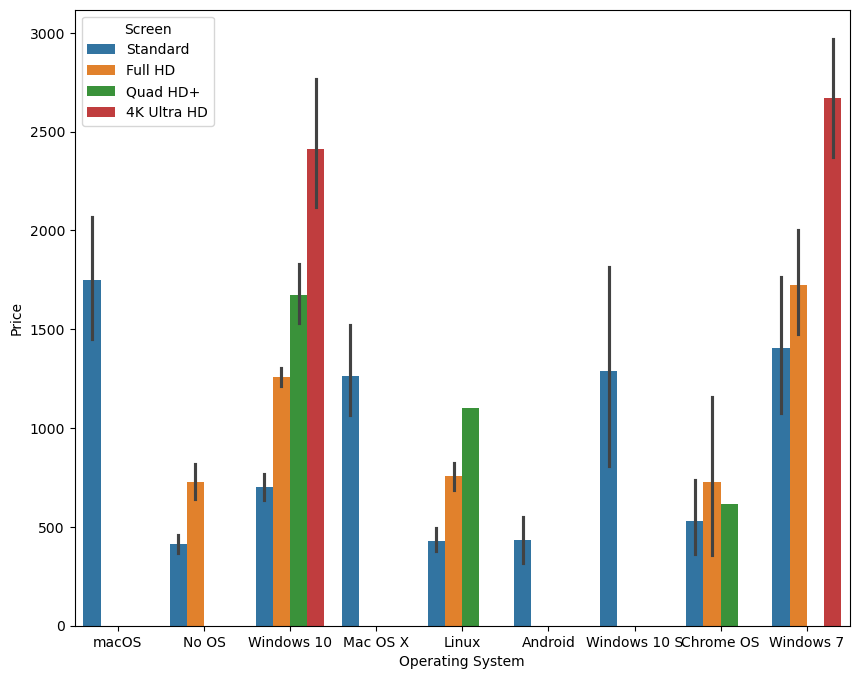

In [22]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['Operating System'], y= data['Price'] , hue =data['Screen'])
plt.show()